In [1]:
import ROOT
import numpy as np
from array import *
import matplotlib.pyplot as plt
import math
from scipy.optimize import brentq
import time

Welcome to JupyROOT 6.28/04


In [2]:
Optimal_g4Z = [9.34209e-07,
1.16962e-06,
1.75634e-06,
3.02662e-06,
2.30074e-07,
3.26467e-07,
5.2649e-07,
1.00899e-06,
1.58755e-07,
2.89677e-07,
4.29873e-07,
1.15435e-06]

In [4]:
Sens_00a = np.loadtxt('../statistics_studies/EvtsNumberFC_hA_BR.dat', delimiter='\t', usecols=(0,1), skiprows=1)
Sens_01a = np.loadtxt('../statistics_studies/EvtsNumberFC_hA_LFG.dat', delimiter='\t', usecols=(0,1), skiprows=1)
Sens_02a = np.loadtxt('../statistics_studies/EvtsNumberFC_hA_ESF.dat', delimiter='\t', usecols=(0,1), skiprows=1)
Sens_00b = np.loadtxt('../statistics_studies/EvtsNumberFC_hN_BR.dat', delimiter='\t', usecols=(0,1), skiprows=1)
Sens_01b = np.loadtxt('../statistics_studies/EvtsNumberFC_hN_LFG.dat', delimiter='\t', usecols=(0,1), skiprows=1)
Sens_02b = np.loadtxt('../statistics_studies/EvtsNumberFC_hN_ESF.dat', delimiter='\t', usecols=(0,1), skiprows=1)
Sens_paper = np.loadtxt('../statistics_studies/EvtsNumberFC_paper.dat', delimiter='\t', usecols=(0,1), skiprows=1)

In [5]:
# lighter DM mass
MB = np.array([5,10,20,40])
# gamma
gam = np.array([1.1, 1.5, 10])
# Heavy DM mass = Lighter DM mass * gamma
MA = np.reshape(np.multiply.outer(gam,MB),12)

In [6]:
np.multiply.outer(gam,MB).size

12

In [7]:
#There is no hA_LFG for m_chi = 10 GeV

conservative_result_01a = []
optimistic_result_01a = []

for i in range(11):
    conservative_result_01a.append(np.max(Sens_01a[:,1][Sens_01a[:,0] == i]))
    optimistic_result_01a.append(np.min(Sens_01a[:,1][Sens_01a[:,0] == i]))



In [8]:
conservative_result_01a

[1.70915e-06,
 2.11279e-06,
 3.14099e-06,
 5.38488e-06,
 2.86193e-07,
 4.02823e-07,
 6.51065e-07,
 1.24573e-06,
 2.12445e-07,
 6.65911e-07,
 1.51707e-06]

In [9]:
optimistic_result_01a

[8.23427e-07,
 1.06222e-06,
 1.54809e-06,
 2.72403e-06,
 2.00844e-07,
 2.83181e-07,
 4.58877e-07,
 8.79471e-07,
 1.3817e-07,
 4.35941e-07,
 1.00586e-06]

In [10]:
conservative_result_01a = np.insert(conservative_result_01a,9, 1e-9)
optimistic_result_01a = np.insert(optimistic_result_01a,9, 10)

In [11]:
conservative_result_01a

array([1.70915e-06, 2.11279e-06, 3.14099e-06, 5.38488e-06, 2.86193e-07,
       4.02823e-07, 6.51065e-07, 1.24573e-06, 2.12445e-07, 1.00000e-09,
       6.65911e-07, 1.51707e-06])

In [12]:
optimistic_result_01a

array([8.23427e-07, 1.06222e-06, 1.54809e-06, 2.72403e-06, 2.00844e-07,
       2.83181e-07, 4.58877e-07, 8.79471e-07, 1.38170e-07, 1.00000e+01,
       4.35941e-07, 1.00586e-06])

In [13]:
conservative_result_00a = []
optimistic_result_00a = []
conservative_result_02a = []
optimistic_result_02a = []
conservative_result_00b = []
optimistic_result_00b = []
conservative_result_01b = []
optimistic_result_01b = []
conservative_result_02b = []
optimistic_result_02b = []

paper_result = []
for i in range(12):
    conservative_result_00a.append(np.max(Sens_00a[:,1][Sens_00a[:,0] == i]))
    optimistic_result_00a.append(np.min(Sens_00a[:,1][Sens_00a[:,0] == i]))
    #conservative_result_01a.append(np.max(Sens_01a[:,1][Sens_01a[:,0] == i]))
    #optimistic_result_01a.append(np.min(Sens_01a[:,1][Sens_01a[:,0] == i]))
    conservative_result_02a.append(np.max(Sens_02a[:,1][Sens_02a[:,0] == i]))
    optimistic_result_02a.append(np.min(Sens_02a[:,1][Sens_02a[:,0] == i]))
    conservative_result_00b.append(np.max(Sens_00b[:,1][Sens_00b[:,0] == i]))
    optimistic_result_00b.append(np.min(Sens_00b[:,1][Sens_00b[:,0] == i]))
    conservative_result_01b.append(np.max(Sens_01b[:,1][Sens_01b[:,0] == i]))
    optimistic_result_01b.append(np.min(Sens_01b[:,1][Sens_01b[:,0] == i]))
    conservative_result_02b.append(np.max(Sens_02b[:,1][Sens_02b[:,0] == i]))
    optimistic_result_02b.append(np.min(Sens_02b[:,1][Sens_02b[:,0] == i]))


    paper_result.append(Sens_paper[i,1])


In [14]:
conser_res = np.maximum.reduce([conservative_result_00a,
                        conservative_result_01a,
                        conservative_result_02a,
                        conservative_result_00b,
                        conservative_result_01b,
                        conservative_result_02b])
opt_res = np.minimum.reduce([optimistic_result_00a,
                     optimistic_result_01a,
                     optimistic_result_02a,
                     optimistic_result_00b,
                     optimistic_result_01b,
                     optimistic_result_02b])

In [15]:
optimistic_result_01a

array([8.23427e-07, 1.06222e-06, 1.54809e-06, 2.72403e-06, 2.00844e-07,
       2.83181e-07, 4.58877e-07, 8.79471e-07, 1.38170e-07, 1.00000e+01,
       4.35941e-07, 1.00586e-06])

In [16]:
conser_res

array([2.37419e-06, 2.88446e-06, 4.18805e-06, 7.18089e-06, 2.99863e-07,
       4.22259e-07, 6.82026e-07, 1.30613e-06, 2.22292e-07, 4.04297e-07,
       6.69579e-07, 1.58889e-06])

In [17]:
opt_res

array([7.03977e-07, 9.20273e-07, 1.33324e-06, 2.36618e-06, 1.94612e-07,
       2.75145e-07, 4.43861e-07, 8.50103e-07, 1.38170e-07, 2.53829e-07,
       3.77699e-07, 1.00586e-06])

In [18]:
paper_result

[4.8953e-07,
 6.61768e-07,
 9.89605e-07,
 1.75996e-06,
 2.21156e-07,
 3.1308e-07,
 5.05103e-07,
 9.73067e-07,
 1.23915e-07,
 2.19949e-07,
 3.60908e-07,
 8.443e-07]

In [19]:
paper_noFC =np.array([6.12877527e-07, 8.28514808e-07, 1.23738536e-06, 2.19586539e-06,2.75543123e-07, 3.90073889e-07, 6.29320177e-07, 1.21236806e-06,1.54204697e-07, 2.72382985e-07, 4.46945198e-07, 1.04557268e-06])

In [22]:
Sens_UL_Frenq = ["Sens_Eff_Bkg_hA_BR.txt", "Sens_Eff_Bkg_hA_ESF.txt", "Sens_Eff_Bkg_hA_LFG.txt", "Sens_Eff_Bkg_hN_BR.txt", "Sens_Eff_Bkg_hN_ESF.txt", "Sens_Eff_Bkg_hN_LFG.txt"]

In [23]:
def readtxt(infile_array):
    listloaded = []
    for infile in infile_array:
        listloaded.append(np.loadtxt(infile, usecols=(3), skiprows=1))
    return listloaded

In [25]:
Sens_UL = np.loadtxt("Sens_Eff_Bkg_hA_BR.txt", usecols=(3), skiprows=1)

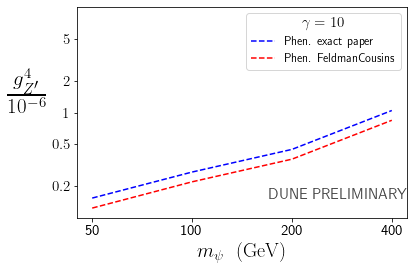

In [21]:
################################################################
#                         PLOT FIGURE                          #
################################################################

fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.rc('text', usetex=True)
plt.rc('font', size=15)

ax1.plot(MA[8:12],paper_noFC[8:12], '--', label='Phen. exact paper',color='blue')
ax1.plot(MA[8:12],paper_result[8:12], '--', label='Phen. FeldmanCousins',color='red')


#ax1.plot(MA[8:12],Sens_01a[8:12], '*-', label='hA_LFG')
#ax1.plot(MA[8:12],Sens_02a[8:12], '*-', label='hA_ESF')
#ax1.plot(MA[8:12],Sens_00b[8:12], '*-', label='hN_BR')
#ax1.plot(MA[8:12],Sens_01b[8:12], '*-', label='hN_LFG')
#ax1.plot(MA[8:12],Sens_02b[8:12], '*-', label='hN_ESF')
#ax1.plot(MA[8:12], PaperDLv[8:12], '*-', label='Phenomenological', color='blue')


#ax1.text(40,0.8e-06,r'$m_\chi=10~\textrm{GeV}$')
#ax1.text(40,0.7e-06,r'$95\%\;C.L.$')
#ax1.text(40,0.6e-06,r'$40~\textrm{kt}\cdot 10~\textrm{years}$')
#plt.text(50,1.2e-06,r'$95%\;C.L.$')

ax1.set_yscale('log')
ax1.set_xscale('log')
#ax1.set_xticks([1.1e1,1.5e1,1e2])
#ax1.set_xticklabels(['11','15','100'])

ax1.set_xticks(MA[8:12])
ax1.set_xticklabels(['50','100','200','400'])
ax1.set_xlabel(r'$m_\psi~\textrm{ (GeV)}$', fontsize=20)
ax1.set_ylabel(r'$\frac{g_{Z^\prime}^4}{10^{-6}}$',rotation=0, fontsize=30,labelpad=25)
ax1.set_ylim(1e-7, 1e-5)
ax1.set_yticks([2e-7,5e-7,1e-6,2e-6,5e-6])
ax1.set_yticklabels([r'$0.2$',r'$0.5$',r'$1$' ,r'$ 2 $',r'$5$'])
minx,maxx = ax1.get_xlim()

ax1.minorticks_off()
ax1.legend(title=r'$\gamma=10$',fontsize = 12, frameon=True)
plt.text(170,1.5e-7,"DUNE PRELIMINARY", alpha=0.7)
plt.tight_layout()
plt.savefig('Last_Sensit_Comparision_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf', dpi=600)
plt.show()
#plt.savefig('Last_Sensit.png', format='png', dpi=600)
############################################################
############################################################

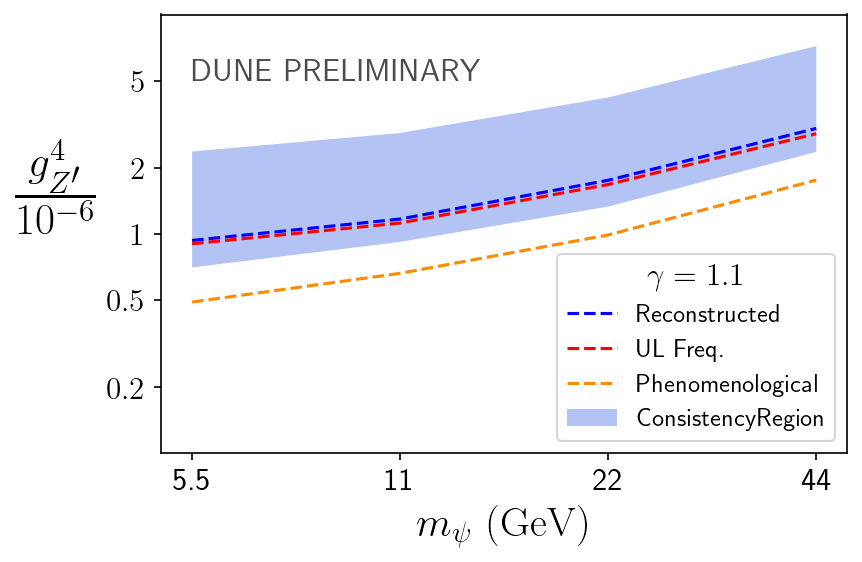

In [27]:
################################################################
#                         PLOT FIGURE                          #
################################################################

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)

plt.rc('text', usetex=True)
plt.rc('font', size=15)

#ax1.plot(MA[:4],conser_res[:4], '--', label='conservative',color='grey')
#ax1.plot(MA[:4],opt_res[:4], '--', label='optimistic',color='blue')
ax1.plot(MA[:4],Optimal_g4Z[:4], '--', label='Reconstructed', color = 'blue')
ax1.plot(MA[:4],Sens_UL[:4], '--', label='UL Freq.', color = 'red')


ax1.plot(MA[:4],paper_result[:4], '--', label='Phenomenological',color='darkorange')
plt.fill_between(MA[:4], conser_res[:4], opt_res[:4], color='royalblue', alpha=0.4,label = 'ConsistencyRegion', ec=None)
#ax1.plot(MA[:4],Sens_01a[:4], '*-', label='hA_LFG')
#ax1.plot(MA[:4],Sens_02a[:4], '*-', label='hA_ESF')
#ax1.plot(MA[:4],Sens_00b[:4], '*-', label='hN_BR')
#ax1.plot(MA[:4],Sens_01b[:4], '*-', label='hN_LFG')
#ax1.plot(MA[:4],Sens_02b[:4], '*-', label='hN_ESF')
#ax1.plot(MA[:4], PaperDLv[:4], '*-', label='Phenomenological', color='blue')



#ax1.text(40,0.8e-06,r'$m_\chi=10~\textrm{GeV}$')
#ax1.text(40,0.7e-06,r'$95\%\;C.L.$')
#ax1.text(40,0.6e-06,r'$40~\textrm{kt}\cdot 10~\textrm{years}$')
#plt.text(50,1.2e-06,r'$95%\;C.L.$')

ax1.set_yscale('log')
ax1.set_xscale('log')
#ax1.set_xticks([1.1e1,1.5e1,1e2])
#ax1.set_xticklabels(['11','15','100'])

ax1.set_xticks([5.5,1.1e1,2.2e1,4.4e1])
ax1.set_xticklabels(['5.5','11','22','44'])
ax1.set_xlabel(r'$m_\psi\textrm{ (GeV)}$', fontsize=20)
ax1.set_ylabel(r'$\frac{g_{Z^\prime}^4}{10^{-6}}$',rotation=0, fontsize=30, labelpad=25)
ax1.set_ylim(1e-7, 1e-5)
ax1.set_yticks([2e-7,5e-7,1e-6,2e-6,5e-6])
ax1.set_yticklabels([r'$0.2$',r'$0.5$',r'$1$' ,r'$ 2 $',r'$5$'])
minx,maxx = ax1.get_xlim()
plt.text(5.5,5e-6,"DUNE PRELIMINARY", alpha=0.7)

ax1.minorticks_off()
ax1.legend(title=r'$\gamma=1.1$',fontsize = 12, frameon=True, loc='lower right')
plt.tight_layout()
plt.savefig('Last_Sensit_b1p1'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf', dpi=600)
plt.show()

############################################################
############################################################

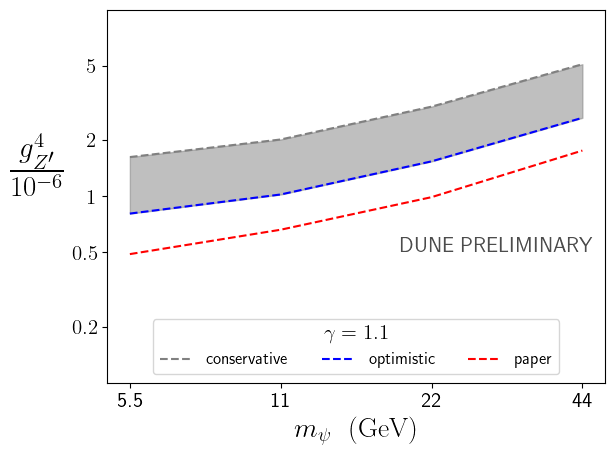

In [22]:
################################################################
#                         PLOT FIGURE                          #
################################################################

fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.rc('text', usetex=True)
plt.rc('font', size=15)

ax1.plot(MA[:4],conservative_result_00a[:4], '--', label='conservative',color='grey')
ax1.plot(MA[:4],optimistic_result_00a[:4], '--', label='optimistic',color='blue')


#ax1.plot(MA[:4],conservative_result_02a[:4], '--', label='conservative',color='grey')
#ax1.plot(MA[:4],optimistic_result_02a[:4], '--', label='optimistic',color='blue')

ax1.plot(MA[:4],paper_result[:4], '--', label='paper',color='red')

plt.fill_between(MA[:4], conservative_result_00a[:4], optimistic_result_00a[:4], color='grey', alpha=0.5)

ax1.set_yscale('log')
ax1.set_xscale('log')
#ax1.set_xticks([1.1e1,1.5e1,1e2])
#ax1.set_xticklabels(['11','15','100'])

ax1.set_xticks([5.5,1.1e1,2.2e1,4.4e1])
ax1.set_xticklabels(['5.5','11','22','44'])
ax1.set_xlabel(r'$m_\psi~\textrm{ (GeV)}$', fontsize=20)
ax1.set_ylabel(r'$\frac{g_{Z^\prime}^4}{10^{-6}}$',rotation=0, fontsize=30, labelpad=25)
ax1.set_ylim(1e-7, 1e-5)
ax1.set_yticks([2e-7,5e-7,1e-6,2e-6,5e-6])
ax1.set_yticklabels([r'$0.2$',r'$0.5$',r'$1$' ,r'$ 2 $',r'$5$'])
minx,maxx = ax1.get_xlim()
plt.text(19,5e-7,"DUNE PRELIMINARY", alpha=0.7)

ax1.minorticks_off()
ax1.legend(title=r'$\gamma=1.1$',fontsize = 12, frameon=True,ncol=3, loc='lower center')
plt.tight_layout()
plt.savefig('Last_Sensit_b1p1'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf', dpi=600)
plt.show()

############################################################
############################################################

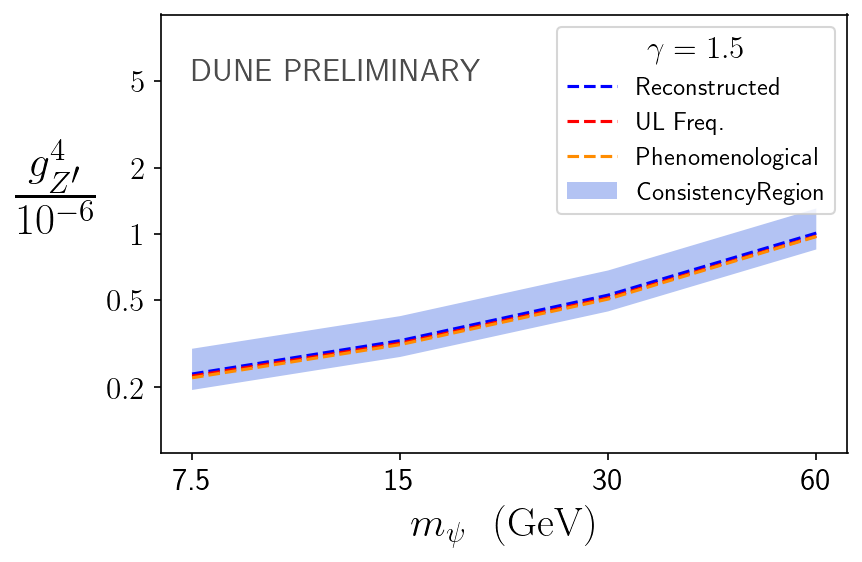

In [28]:
################################################################
#                         PLOT FIGURE                          #
################################################################

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)

plt.rc('text', usetex=True)
plt.rc('font', size=15)

#ax1.plot(MA[4:8],conser_res[4:8], '--', label='conservative',color='grey')
#ax1.plot(MA[4:8],opt_res[4:8], '--', label='optimistic',color='blue')
ax1.plot(MA[4:8],Optimal_g4Z[4:8], '--', label='Reconstructed', color = 'blue')
ax1.plot(MA[4:8],Sens_UL[4:8], '--', label='UL Freq.', color = 'red')


ax1.plot(MA[4:8],paper_result[4:8], '--', label='Phenomenological',color='darkorange')
plt.fill_between(MA[4:8], conser_res[4:8], opt_res[4:8], color='royalblue', alpha=0.4,label = 'ConsistencyRegion', ec=None)
#ax1.plot(MA[4:8],Sens_01a[4:8], '*-', label='hA_LFG')
#ax1.plot(MA[4:8],Sens_02a[4:8], '*-', label='hA_ESF')
#ax1.plot(MA[4:8],Sens_00b[4:8], '*-', label='hN_BR')
#ax1.plot(MA[4:8],Sens_01b[4:8], '*-', label='hN_LFG')
#ax1.plot(MA[4:8],Sens_02b[4:8], '*-', label='hN_ESF')
#ax1.plot(MA[4:8], PaperDLv[4:8], '*-', label='Phenomenological', color='blue')





#ax1.text(40,0.8e-06,r'$m_\chi=10~\textrm{GeV}$')
#ax1.text(40,0.7e-06,r'$95\%\;C.L.$')
#ax1.text(40,0.6e-06,r'$40~\textrm{kt}\cdot 10~\textrm{years}$')
#plt.text(50,1.2e-06,r'$95%\;C.L.$')

ax1.set_yscale('log')
ax1.set_xscale('log')
#ax1.set_xticks([1.1e1,1.5e1,1e2])
#ax1.set_xticklabels(['11','15','100'])

ax1.set_xticks(MA[4:8])
ax1.set_xticklabels(['7.5','15','30','60'])
ax1.set_xlabel(r'$m_\psi~\textrm{ (GeV)}$', fontsize=20)
ax1.set_ylabel(r'$\frac{g_{Z^\prime}^4}{10^{-6}}$',rotation=0, fontsize=30, labelpad=25)
ax1.set_ylim(1e-7, 1e-5)
ax1.set_yticks([2e-7,5e-7,1e-6,2e-6,5e-6])
ax1.set_yticklabels([r'$0.2$',r'$0.5$',r'$1$' ,r'$ 2 $',r'$5$'])
minx,maxx = ax1.get_xlim()

plt.text(7.5,5e-6,"DUNE PRELIMINARY", alpha=0.7)
ax1.minorticks_off()
ax1.legend(title=r'$\gamma=1.5$',fontsize = 12, frameon=True)
plt.tight_layout()
plt.savefig('Last_Sensit_b1p5'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf', dpi=600)
plt.show()

############################################################
############################################################

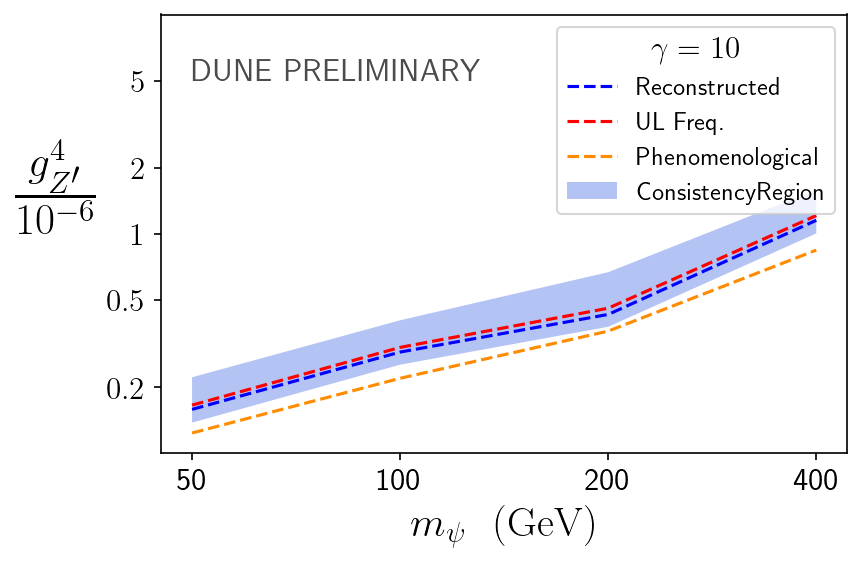

In [29]:
################################################################
#                         PLOT FIGURE                          #
################################################################

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)

plt.rc('text', usetex=True)
plt.rc('font', size=15)

#ax1.plot(MA[8:12],conser_res[8:12], '--', label='conservative',color='grey')
#ax1.plot(MA[8:12],opt_res[8:12], '--', label='optimistic',color='blue')
ax1.plot(MA[8:12],Optimal_g4Z[8:12], '--', label='Reconstructed', color = 'blue')
ax1.plot(MA[8:12],Sens_UL[8:12], '--', label='UL Freq.', color = 'red')


ax1.plot(MA[8:12],paper_result[8:12], '--', label='Phenomenological',color='darkorange')
plt.fill_between(MA[8:12], conser_res[8:12], opt_res[8:12], color='royalblue', alpha=0.4,label = 'ConsistencyRegion', ec=None)

#ax1.plot(MA[8:12],Sens_01a[8:12], '*-', label='hA_LFG')
#ax1.plot(MA[8:12],Sens_02a[8:12], '*-', label='hA_ESF')
#ax1.plot(MA[8:12],Sens_00b[8:12], '*-', label='hN_BR')
#ax1.plot(MA[8:12],Sens_01b[8:12], '*-', label='hN_LFG')
#ax1.plot(MA[8:12],Sens_02b[8:12], '*-', label='hN_ESF')
#ax1.plot(MA[8:12], PaperDLv[8:12], '*-', label='Phenomenological', color='blue')


#ax1.text(40,0.8e-06,r'$m_\chi=10~\textrm{GeV}$')
#ax1.text(40,0.7e-06,r'$95\%\;C.L.$')
#ax1.text(40,0.6e-06,r'$40~\textrm{kt}\cdot 10~\textrm{years}$')
#plt.text(50,1.2e-06,r'$95%\;C.L.$')

ax1.set_yscale('log')
ax1.set_xscale('log')
#ax1.set_xticks([1.1e1,1.5e1,1e2])
#ax1.set_xticklabels(['11','15','100'])

ax1.set_xticks(MA[8:12])
ax1.set_xticklabels(['50','100','200','400'])
ax1.set_xlabel(r'$m_\psi~\textrm{ (GeV)}$', fontsize=20)
ax1.set_ylabel(r'$\frac{g_{Z^\prime}^4}{10^{-6}}$',rotation=0, fontsize=30,labelpad=25)
ax1.set_ylim(1e-7, 1e-5)
ax1.set_yticks([2e-7,5e-7,1e-6,2e-6,5e-6])
ax1.set_yticklabels([r'$0.2$',r'$0.5$',r'$1$' ,r'$ 2 $',r'$5$'])
minx,maxx = ax1.get_xlim()

ax1.minorticks_off()
ax1.legend(title=r'$\gamma=10$',fontsize = 12, frameon=True)
plt.text(50,5e-6,"DUNE PRELIMINARY", alpha=0.7)
plt.tight_layout()
plt.savefig('Last_Sensit_b10'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf', dpi=600)
plt.show()
#plt.savefig('Last_Sensit.png', format='png', dpi=600)
############################################################
############################################################